## Observations and Insights 

1. Based on mean of Tumor Volume and number of overall timepoints, it appears that Ramicane was the most effective drug regimen in the study.
2. In the four drug regimens that were focused on, the data appeared to be relatively distributed, with only one outlier in the Infubinol group, mouse 'c326'
3.  Going off of the very limited data we have on mouse 'c326', it is difficult to tell what the cause of the dramatic drop in tumor size was.

In [281]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = r"C:\Users\hmwhi\OneDrive\Desktop\GitHub\Matplotlib-challenge\Resources\Mouse_metadata.csv"
study_results_path = r"C:\Users\hmwhi\OneDrive\Desktop\GitHub\Matplotlib-challenge\Resources\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df= pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [282]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].nunique()
print(mice_count)

249


In [283]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_df[combined_df.duplicated()]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [284]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mouse.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [285]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(["Mouse ID","Timepoint"])

clean_df.to_csv("Resources/clean_study_results.csv", index= True)

clean_df["Mouse ID"].value_counts()

h246    10
a492    10
q511    10
g791    10
r604    10
        ..
t573     1
l872     1
v199     1
f932     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [286]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_df["Mouse ID"].nunique()
print(clean_count)

249


## Summary Statistics

In [287]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_group_df = clean_df.groupby(["Drug Regimen"])

summary_table_stats = pd.DataFrame()
summary_table_stats["Mean Tumor Volume"] = drug_group_df["Tumor Volume (mm3)"].mean().round(2)
summary_table_stats["Median"] = drug_group_df["Tumor Volume (mm3)"].median().round(2)
summary_table_stats["Variance"] = drug_group_df["Tumor Volume (mm3)"].var().round(2)
summary_table_stats["Standard Deviation"] = drug_group_df["Tumor Volume (mm3)"].std().round(2)
summary_table_stats["Std Error of Mean"] = drug_group_df["Tumor Volume (mm3)"].sem().round(2)

summary_table_stats



,Mean Tumor Volume,Median,Variance,Standard Deviation,Std Error of Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [288]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#  and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
alt_summary_table_stats = drug_group_df.agg({"Tumor Volume (mm3)" : ['mean','median','var','std','sem']}).round(2)
alt_summary_table_stats


Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

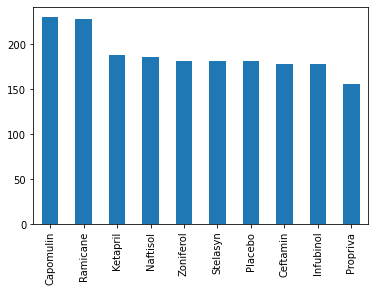

In [289]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_points = clean_df['Drug Regimen'].value_counts()

time_points.plot(kind='bar')

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

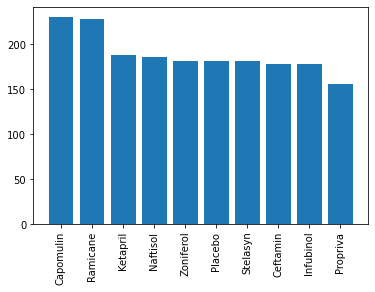

In [290]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_names = ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol',
            'Placebo','Stelasyn','Ceftamin','Infubinol','Propriva']
plt.bar(drug_names,time_points,alpha=1,align='center')
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Sex'>

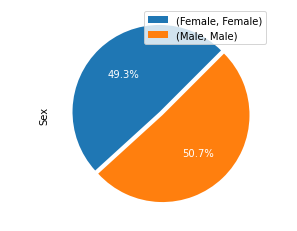

In [291]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = clean_df.groupby(['Sex'])
genders = ['Male','Female']
gender_counts = mice_gender['Sex'].value_counts()
explode = (.05,0)
gender_counts.plot(kind='pie',explode=explode,startangle=45,autopct="%1.1f%%",textprops={'color':'w'},legend=genders)


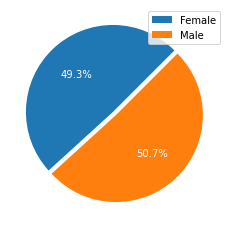

In [292]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# plt.pie(time_points,labels=drug_names,textprops={'color':'w'})
labels = ['Female','Male']
plt.pie(gender_counts,labels=labels,explode=explode,startangle=45,autopct="%1.1f%%",textprops={'color':'w'})
plt.legend(labels)

## Quartiles, Outliers and Boxplots

['Mouse ID','Drug Regimen','Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites']



In [293]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

time_and_size_df = clean_df[['Mouse ID','Timepoint','Tumor Volume (mm3)']]
timepoints_df = time_and_size_df.groupby('Mouse ID')
final_timepoint = timepoints_df['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_vol_df = pd.merge(final_timepoint,clean_df,on=['Mouse ID','Timepoint'],how='left')

final_vol_df = final_vol_df.rename(columns={'Tumor Volume (mm3)_x' : 'Tumor Volume (mm3)'})
final_vol_df = final_vol_df[['Mouse ID','Drug Regimen','Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites']]
final_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [294]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
volumes = final_vol_df['Tumor Volume (mm3)']

drugs_df = final_vol_df.loc[(final_vol_df['Drug Regimen'] == 'Capomulin')|
        (final_vol_df['Drug Regimen'] == 'Ramicane')|
        (final_vol_df['Drug Regimen'] =='Infubinol')|
        (final_vol_df['Drug Regimen'] =='Ceftamin'),:]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

final_vol_df['Tumor Volume (mm3)'].min()

outliers = []
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_drugs = final_vol_df.loc[(final_vol_df['Drug Regimen'] == drug)]

    # add subset 
    tumor_volume.append(filtered_drugs['Tumor Volume (mm3)'])

    # Determine outliers using upper and lower bounds
    quartiles = filtered_drugs['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    drug_outliers = filtered_drugs.loc[
        (filtered_drugs['Tumor Volume (mm3)'] < lower_bound) |
        (filtered_drugs['Tumor Volume (mm3)'] > upper_bound)]
    min_vol = filtered_drugs['Tumor Volume (mm3)'].min()
    print(f'The outliers for {drug} are: {drug_outliers}')

The outliers for Capomulin are: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
The outliers for Ramicane are: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
The outliers for Infubinol are:    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
31     c326    Infubinol  Female          18          25          5   

    Tumor Volume (mm3)  Metastatic Sites  
31           36.321346                 0  
The outliers for Ceftamin are: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


<ipython-input-295-42b69f6b1d12>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_list)


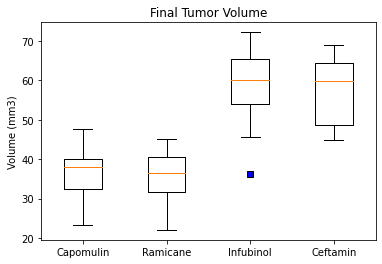

In [295]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Volume (mm3)')
ax1.set_xticklabels(drug_list)
blue_square = dict(markerfacecolor='b',marker='s')
ax1.boxplot(tumor_volume,flierprops=blue_square)

plt.show()

## Line and Scatter Plots

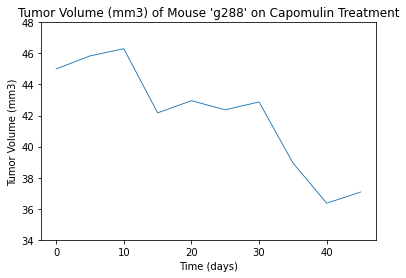

In [296]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
g288_df = clean_df.loc[clean_df['Mouse ID'] == 'g288']
g288_time = g288_df['Timepoint']
g288_volume = g288_df['Tumor Volume (mm3)']

plt.plot(g288_time,g288_volume,linewidth=0.9)
plt.title("Tumor Volume (mm3) of Mouse 'g288' on Capomulin Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(34,48)
plt.show()


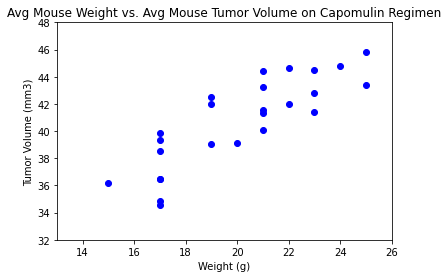

In [297]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
capomulin_df = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin')]
capomulin_avgs = capomulin_df.groupby(['Mouse ID']).mean()


weight = capomulin_avgs['Weight (g)']
volume = capomulin_avgs['Tumor Volume (mm3)']

marker_size = 10
plt.scatter(weight,volume,color='blue')
plt.title('Avg Mouse Weight vs. Avg Mouse Tumor Volume on Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(13,26)
plt.ylim(32,48)
plt.show()

## Correlation and Regression

The correlation between weight and tumor volume is 0.84.


Text(15, 43.5, 'y = 0.95x + 21.55')

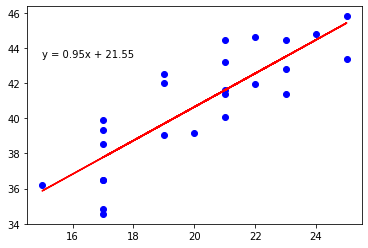

In [298]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(weight,volume)[0],2)
print(f'The correlation between weight and tumor volume is {correlation}.')

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,volume)
regression_values = weight * slope + intercept
slope_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight,volume,color='blue')
plt.plot(weight,regression_values,"r-")
plt.annotate(slope_equation,(15,43.5),color='black')